In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
from loader import *
from models import *
from utils import *
from plotting import *

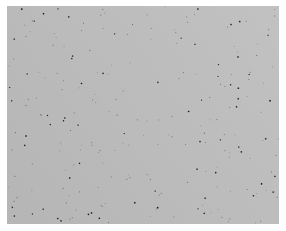

In [3]:
moving_plankton = moving_spherical_plankton(im_size_height=512, 
                                            im_size_width=640, 
                                            radius=0.4e-6, 
                                            label=1, 
                                            diffusion_constant_coeff=1.3)

stationary_plankton = stationary_spherical_plankton(im_size_height=512, 
                                                    im_size_width=640, 
                                                    radius=0.2e-6, 
                                                    label=0)

sequential_moving_plankton = Sequential(moving_plankton, position=get_position_moving_plankton)
sequential_stationary_plankton = Sequential(stationary_plankton, position=get_position_stationary_plankton)

microscope = plankton_brightfield(im_size_height=512, 
                                  im_size_width=640, 
                                  gradient_amp=0.1)

no_of_moving_planktons, no_of_stationary_planktons = 80, 200

sample = create_sample(sequential_moving_plankton, no_of_moving_planktons, 
                       sequential_stationary_plankton, no_of_stationary_planktons) 

noise_amp = 0.1
norm_min, norm_max= 0, 1
sequence = create_sequence(noise_amp, sample, microscope, norm_min, norm_max)

sequence_length = 3
imaged_particle_sequence = Sequence(sequence, sequence_length=sequence_length)

imaged_particle_sequence.plot(cmap='gray')

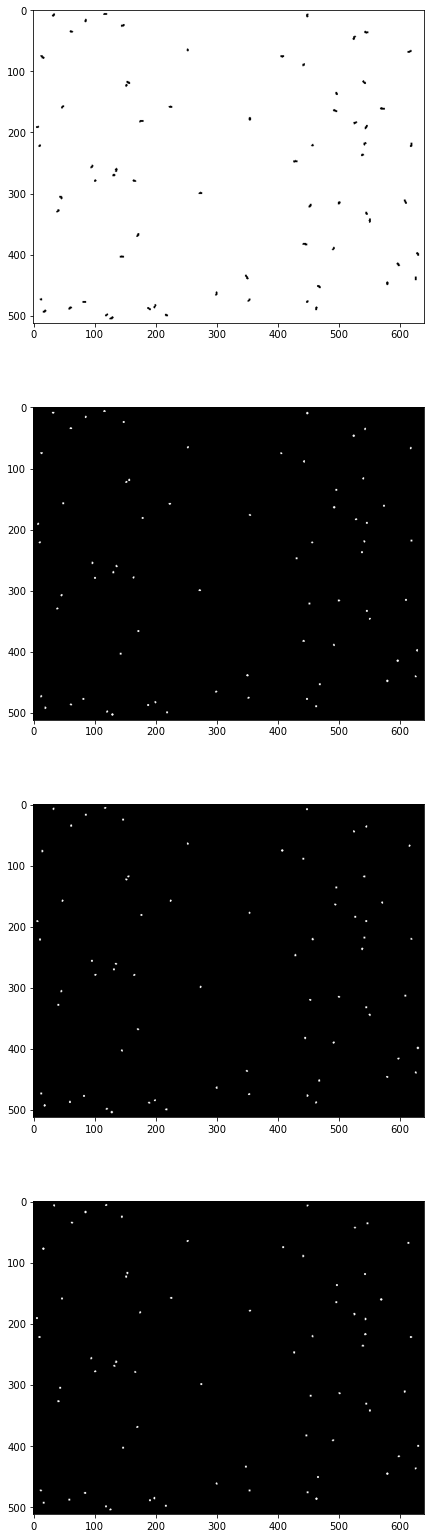

In [4]:
label = get_target_sequence(imaged_particle_sequence.resolve())
label_function = get_target_sequence
plot_label(label_function, imaged_particle_sequence)

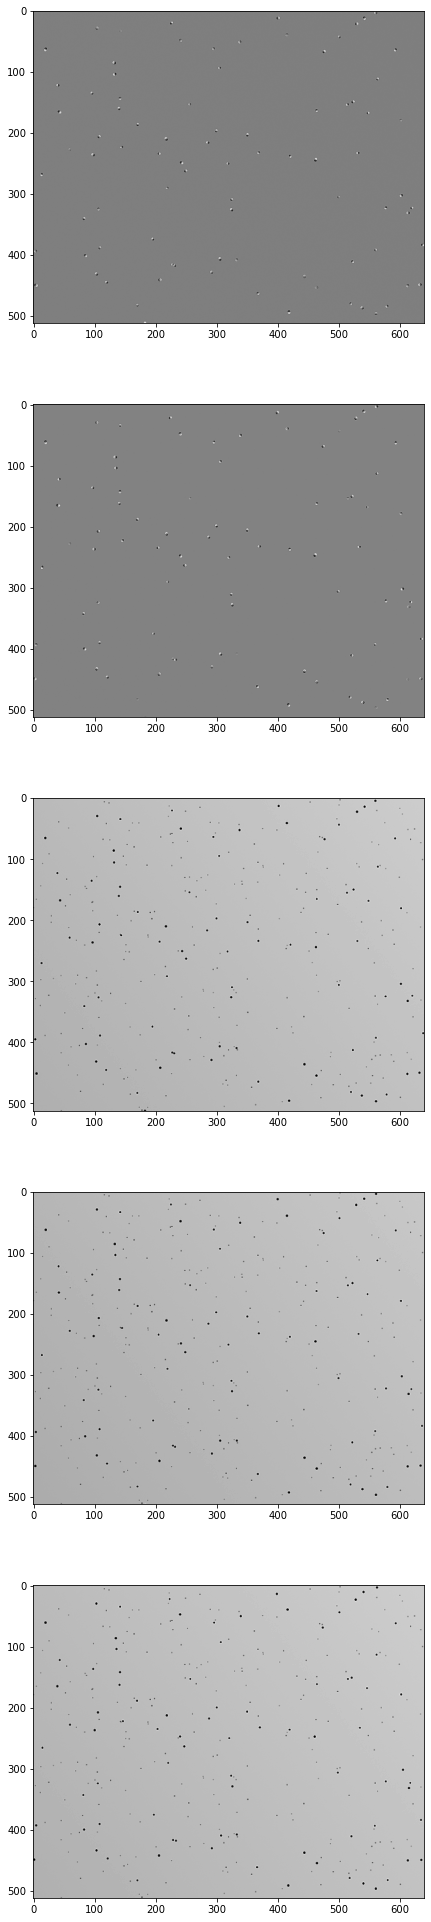

In [87]:
batch_function = create_custom_batch_function(imaged_particle_sequence, 
                                              outputs = [ "diff", "diff", "img", "img", "img"], 
                                              output_numbers = [[0,1], [1,2], 0, 1, 2],
                                              function_img=[Normalize_image],
                                              function_diff=[Normalize_image])


train_images = batch_function(imaged_particle_sequence.resolve())

plot_batch(train_images)

In [79]:
from deeptrack.generators import ContinuousGenerator
generator = ContinuousGenerator(
    imaged_particle_sequence,
    get_target_sequence,
    custom_batch_function1,
    batch_size=2,
    min_data_size=4,
    max_data_size=512
    )

In [80]:
model = generate_unet(im_size_height=512, im_size_width=640, no_of_inputs=5, number_of_outputs=4)

In [81]:
model = train_model(model, generator, patience=20, epochs=30, steps_per_epoch=2)

Generating 4 / 4 samples before starting training
Epoch 1/30
2/2 [==============================] - 0s 72ms/step - loss: 0.0042
Epoch 2/30
2/2 [==============================] - 0s 65ms/step - loss: 0.0041
Epoch 3/30
2/2 [==============================] - 0s 60ms/step - loss: 0.0041
Epoch 4/30
2/2 [==============================] - 0s 56ms/step - loss: 0.0040
Epoch 5/30
2/2 [==============================] - 0s 59ms/step - loss: 0.0039
Epoch 6/30
2/2 [==============================] - 0s 62ms/step - loss: 0.0039
Epoch 7/30
2/2 [==============================] - 0s 76ms/step - loss: 0.0038
Epoch 8/30
2/2 [==============================] - 0s 56ms/step - loss: 0.0037
Epoch 9/30
2/2 [==============================] - 0s 57ms/step - loss: 0.0036
Epoch 10/30
2/2 [==============================] - 0s 66ms/step - loss: 0.0035
Epoch 11/30
2/2 [==============================] - 0s 61ms/step - loss: 0.0034
Epoch 12/30
2/2 [==============================] - 0s 100ms/step - loss: 0.0032
Epoch 13/3

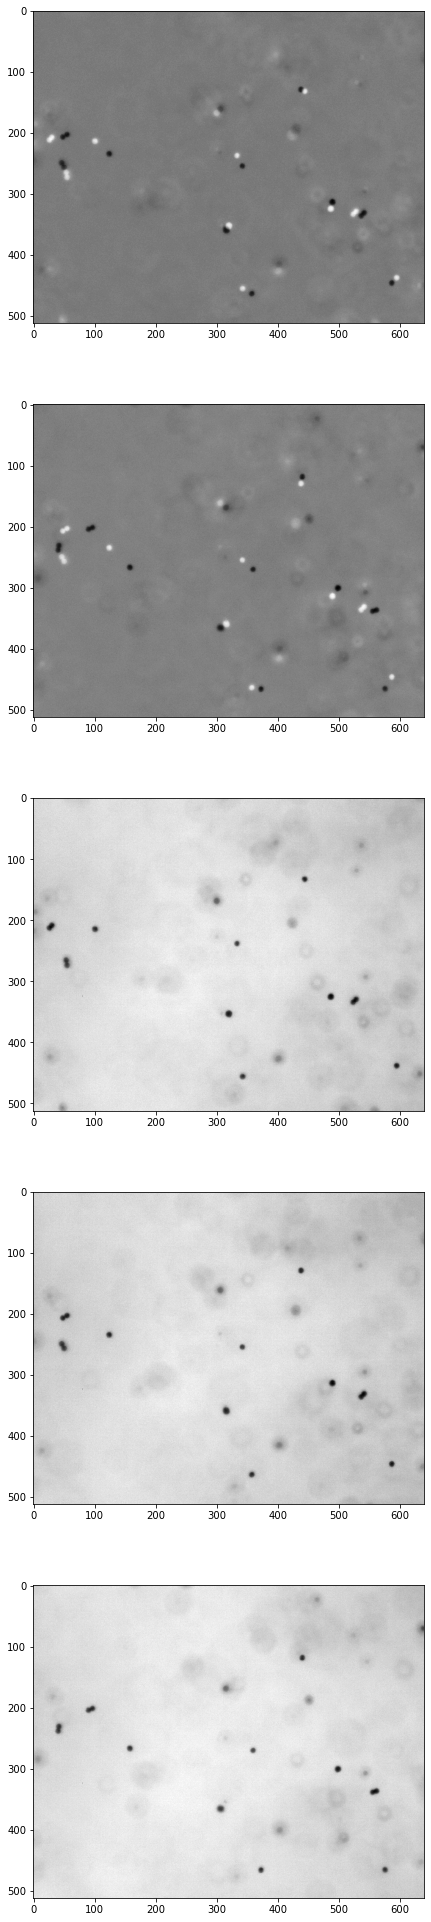

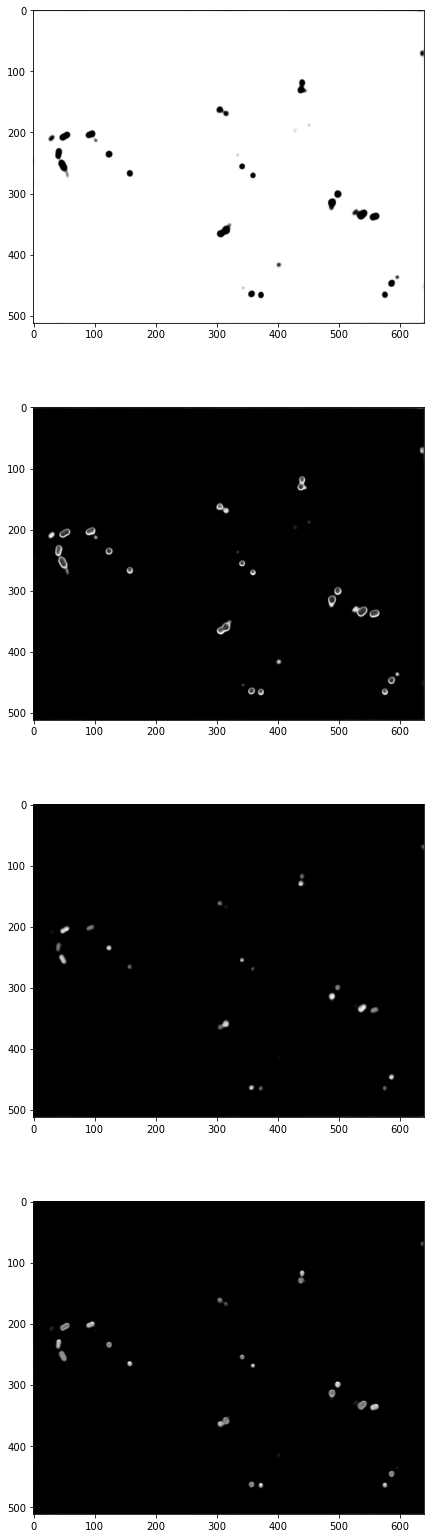

In [83]:
# outputs = ["img", "img", "img", "diff", "diff"]
# output_numbers = [0, 1, 2, [0,1], [1,2]]

im_stack = get_image_stack(outputs=["diff", "diff", "img", "img", "img"], 
                           output_numbers = [[0,1], [1,2], 0, 1, 2], 
                           folder_path = 'E:\Documents\Anaconda\Jupyterkod\Exjobb\Egen kod\Exjobb\From erik\\alexandrium2', 
                           frame_im0 = 39, 
                           im_size_width = 640, 
                           im_size_height = 512,
                           function_img=[Normalize_image], 
                           function_diff=[Normalize_image])

plot_im_stack(im_stack)
plot_prediction(model=model, im_stack=im_stack)
# plt.imshow(model.predict(im_stack)[0,:,:,1], cmap='gray')

In [73]:
test_function()

7


In [63]:
def outer_func(string, num_to_add=0):
    def inner_func(**kwargs):
        return print(string, num_to_add)
    return inner_func

testfun = outer_func('apa', num_to_add=7)
testfun('apa')

TypeError: outer_func() missing 1 required positional argument: 'string'